# Ödev: 6 - Çözüm
## FİZ220 - Bilgisayar Programlama II | 09/06/2020

**Fonksiyonlar, Türev ve İntegral**
* Ödev (Rutin Grup Ödevi)

Dr. Emre S. Taşcı, emre.tasci@hacettepe.edu.tr  
Fizik Mühendisliği Bölümü  
Hacettepe Üniversitesi

# Ödev (Rutin Grup Ödevi)

$$f'(x) = \frac{f(x+\Delta x) - f(x-\Delta x)}{2\Delta x}$$ 

yaklaşımını kullanarak $[-\pi,\pi]$ aralığında $\cos(x)$ grafiğini $\sin(x)$'in türevini hesaplamak yoluyla çizdirin.

## Minimal, optimal, temiz çözüm

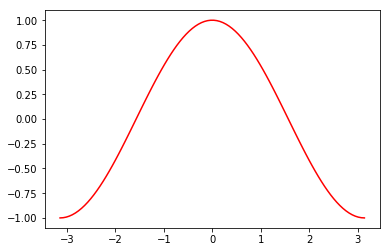

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# halihazırda np.sin(x) tanımlı olduğundan, 
# ayrıca fonksiyon olarak tanımlamak zorunda değiliz

delta_x = 1E-6
x = np.linspace(-np.pi,np.pi,100)
kos_helva = (np.sin(x+delta_x) - np.sin(x-delta_x))/(2*delta_x)

plt.plot(x,kos_helva,"-r")
plt.show()

## Üzücü çözüm (sizlerden genel olarak bu şekilde geldi)

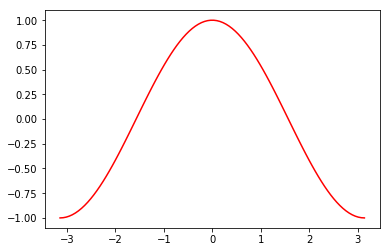

In [2]:
import numpy as np
import matplotlib.pyplot as plt

delta_x = 1E-6
x = np.linspace(-np.pi,np.pi,100)

def f(x):
    return np.sin(x)

x_degerleri = np.empty((0))
y_degerleri = np.empty((0))

for i in x:
    y_degerleri = np.append(y_degerleri,(f(i+delta_x)-f(i-delta_x))/(2*delta_x))
    x_degerleri = np.append(x_degerleri,i)

plt.plot(x_degerleri,y_degerleri,"-r")
plt.show()

Burada, derslerimiz boyunca altını sıklıkla çizdiğim bir gerçeği kullanmayıp, hamaliye yapmaktayız: GNU Octave (/MATLAB) olsun, Python olsun, bunlar ardışık nümerik işlemler için süper optimize edilmişlerdir (eskinin [*Cray/vektör bilgisayarları*](https://en.wikipedia.org/wiki/Vector_processor) gibi). Elimizde gayet şık, güzel, ilgilendiğimiz aralıktaki sayıları tutan $x$ vektörümüz/dizimiz var; onun bütün elemanlarını aynı işlemden geçireceğiz, tamamdır -- e o zaman elemanlarını tek tek ele almak niye? verelim vektörü olsun bitsin. Ayrıca: el emeği, göz nuru ile toparladığımız $x\_degerleri$ dizisi ile $x$ dizisi arasında ne fark var? (Yok bir fark)

## Çok üzücü, korkunç çözüm 😱😱😱


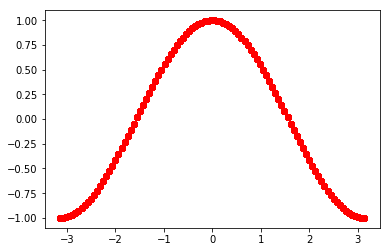

In [3]:
import numpy as np
import matplotlib.pyplot as plt

delta_x = 1E-6
x = np.linspace(-np.pi,np.pi,100)

def f(x):
    return np.sin(x)

for i in x:
    y = (f(x+delta_x)-f(x-delta_x))/(2*delta_x)
    plt.plot(x,y,"or")


Bu gambitte, oyuna bir önceki Taşcı-Üzücü Çözüm açılışı ile başlayıp, varyasyon olarak, döngümüze geldiğimizde 100 kere aynı şeyi tekrar tekrar hesaplatıp 100 kez çizdiriyoruz! Aman sakın. Sakın...

## Çok janti, şık çözüm 😎

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, interact

# halihazırda np.sin(x) tanımlı olduğundan, 
# ayrıca fonksiyon olarak tanımlamak zorunda değiliz

delta_x = 1E-6
x0 = np.linspace(-np.pi,np.pi,500)
kos0 = np.cos(x0)

def grafikler(N):
    x = np.linspace(-np.pi,np.pi,N)
    kos_helva = (np.sin(x+delta_x) - np.sin(x-delta_x))/(2*delta_x)
    plt.plot(x,kos_helva,"or")
    plt.plot(x0,kos0,"-b")
    plt.show()

aux = interact(grafikler, N=(10,110,10))

interactive(children=(IntSlider(value=60, description='N', max=110, min=10, step=10), Output()), _dom_classes=…

Bu çözümde kullanılan `interact` tekniğini 0. gruptan (Furkan, Mete, Hasan, Aytaç ve Uras) öğrendim ben de, çok teşekkür ederim!